In [1]:
from Brownsville import BrownsvilleAPI
import pandas as pd 
import matplotlib.pyplot as plt

# Brownsville Analysis

This analysis uses the Brownsville API to perform a prelimanry analysis on the dataset. It explores the most common types of complaints over the years and identifies trends in the number of complaints reported over the years.

In [2]:
brownsville = BrownsvilleAPI.Brownsville()

Loading cached dataset...


## Building Coverage

In [3]:
print(f"Building coverage: {len(brownsville.buildings)}")

Building coverage: 2603


## Complaint types

In [4]:
building_common_complaints = []
for _id in brownsville.buildings:
    common_complaints = brownsville.get_feature_occurrences_by_building(
                                                            _id,
                                                            by=["majorcategory", "minorcategory"],
                                                            find_all=True)

    building_common_complaints.append((_id, common_complaints))
building_common_complaints.sort(key=lambda e: e[1].values.sum(), reverse=True)

In [5]:
for building in building_common_complaints[:10]:
    id_, complaints = building
    major_category, minor_category = complaints.index[0]
    num_complaints = complaints.values.sum()

    print("Building ID:", id_)
    print("Most common major category:", major_category)
    print("Most common minor category:", minor_category)
    print("Number of complaints:", num_complaints)

    print()

Building ID: 309623
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 1472

Building ID: 329071
Most common major category: UNSANITARY CONDITION
Most common minor category: PESTS
Number of complaints: 1456

Building ID: 808943
Most common major category: UNSANITARY CONDITION
Most common minor category: PESTS
Number of complaints: 829

Building ID: 314098
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 794

Building ID: 323953
Most common major category: HEAT/HOT WATER
Most common minor category: APARTMENT ONLY
Number of complaints: 685

Building ID: 208652
Most common major category: PLASTER PAINT/PLASTER
Most common minor category: WALLS WALL
Number of complaints: 574

Building ID: 351727
Most common major category: HEAT/HOT WATER
Most common minor category: ENTIRE BUILDING
Number of complaints: 574

Building ID: 314175
Most common major category: HEAT/HOT WATER
Most

## Complaints over time

<BarContainer object of 10 artists>

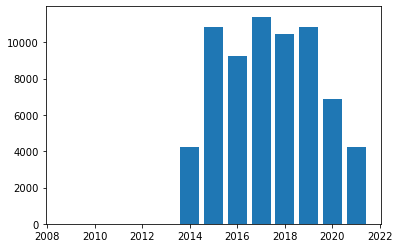

In [6]:
complaints_by_month = brownsville.records_by_date(period="year")
x, y = complaints_by_month.index, complaints_by_month.values
plt.bar(x, y)

Winter: 19951
Spring: 13732
Summer: 13838
Autumn: 20607


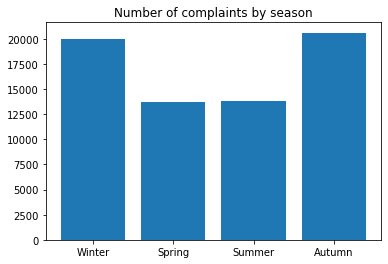

In [7]:
x, y = brownsville.records_by_season()
plt.bar(x, y)
plt.title("Number of complaints by season")
plt.show()

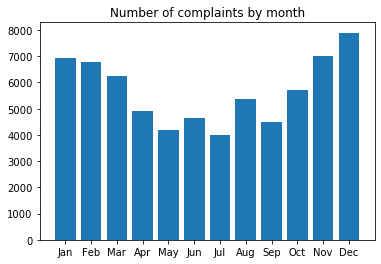

In [8]:
complaints_by_month = brownsville.records_by_date()
x, y = complaints_by_month.index, complaints_by_month.values
plt.bar(x, y)
plt.title("Number of complaints by month")
plt.show()

In [9]:
steps = 4
years = brownsville.records_by_date(period="year", num_years=8, step=steps)

for year in years:

    x = list(year.index.values)
    y = list(year.values)
    label = f"{year.index[0]} to {year.index[-1]}"

    plt.plot(np.arange(0, steps), y, label=label)
    
plt.xlabel("Number of years")
plt.ylabel("Complaints reported")
plt.title("Number of complaints over a period of 8 years on 4 year intervals")
plt.legend()
plt.show()

NameError: name 'np' is not defined

In [ ]:
brownsville.get_date_range("received")

In [ ]:
len(brownsville.data["address"].unique())

In [ ]:
brownsville.display_map()